# Generate the Argon FCC Crystal Lattice

In [27]:
from ase import Atoms
from ase.build import bulk
from ase.io import write

lattice_constant = 5.26

# Example: Create a bulk Argon structure (FCC, lattice a=5.26 Å)
atoms = bulk('Ar', 'fcc', a=lattice_constant, cubic=True)

# (Optional) Create a 4x4x4 supercell
supercell = atoms.repeat((8, 8, 8))

# Write to a LAMMPS data file
write('Ar.data', supercell, format='lammps-data')

# Define Simulation Parameters
---

In [28]:
# Define Variables
N = 256
kb = 1.380649e-23

# Conversions
atmToPascal = 101325
angstrom3Tom3 = 1e-30

# Calculation Variables
totalSteps = 1000000
framesPerSave = 100

RDF_Bins = 50

# File Names
#PVNRT_Name_Sim1 = "Sim1.out"
#RDF_Name_Sim1 = "RDF_Sim1.data"

PVNRT_Name_Sim1 = "slurm-528.out"
RDF_Name_Sim1 = "RDF_Sim5.data"


#PVNRT_Name_Sim2 = "slurm-525.out"
#RDF_Name_Sim2 = "RDF.data"

# Read Files
-----

In [29]:
import pandas
import matplotlib.pyplot as plt
import os

def read_TPVE_File (path : str, totalSteps : int, saveEveryNFrames: int ):

    columns = ["Step", "Temp", "Press", "Volume", "TotEng"] 

    with open(path, "r") as f:
        totalLineCount = sum(1 for _ in f)

    PVNRTLines = totalSteps // saveEveryNFrames
    skipRows = totalLineCount - PVNRTLines - 28

    df = pandas.read_csv(path, skiprows=skipRows, nrows=PVNRTLines + 1 , delim_whitespace=True, header=None)

    df.columns = columns

    return df

def read_RDF_File (path : str, n_bins : int):

    columns = [
    "Bin", "r",
    "g_Ar-Ar", "coord_Ar-Ar",
    ]

    with open(path, "r") as f:
        fileSize = len(f.readlines())

    dfs = []

    rdfGroups = (fileSize - 5) // (n_bins + 1)

    for i in range(rdfGroups+1):

        df = pandas.read_csv(path, skiprows=4 + i * (n_bins + 1), nrows = n_bins, delim_whitespace=True, header=None)
        df.columns = columns
        dfs.append(df)
    
    return dfs

# Define Plotting Functions
----

In [30]:
def plot_RDF(df: pandas.DataFrame, params: str):

    plt.figure(figsize=(20, 16))

    plt.plot(df["r"], df["g_Ar-Ar"], label="Ar-Ar")

    plt.xlabel("Radius (Å)")
    plt.ylabel("Radial Distribution function - g(r)")
    plt.title(f"The Radial Distribution function of a Argon FCC Crystal Lattice ({params})")
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_multi_RDF(dfs: list[pandas.DataFrame], params: str, label : list[str]):

    plt.figure(figsize=(20, 16))

    for i in range(len(dfs)):
        plt.plot(dfs[i]["r"], dfs[i]["g_Ar-Ar"], label=label[i])

    plt.xlabel("Radius (Å)")
    plt.ylabel("Radial Distribution function - g(r)")
    plt.title(f"The Radial Distribution function of a Argon FCC Crystal Lattice ({params})")
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_PVRNT(df : pandas.DataFrame, zeroLine : bool = True):
    plt.figure(figsize=(20, 16))
    
    # Add a Zero line 
    if (zeroLine):
        plt.axhline(0, color="black", linewidth=1, linestyle="--")

    steps = df["Step"]
    temp = df["Temp"]
    press = df["Press"] * atmToPascal
    volume = df["Volume"] * angstrom3Tom3

    term1 = press * volume
    term2 = N * kb * temp

    yVal = term1 - term2

    plt.plot(steps, yVal, label="Argon")

    plt.xlabel("Number of Total Steps")
    plt.ylabel("Ideal Gas Law (PV-Nk_BT)")
    plt.title("Plot of the Ideal Gas Law Equation for FCC Argon over the course of a NVT Simulation")
    plt.legend()
    plt.grid(True)
    plt.show()

# Exercise 1 : Plot the PV - Nk_BT Graph
----

/tmp/ipykernel_117627/2262072416.py:15: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pandas.read_csv(path, skiprows=skipRows, nrows=PVNRTLines + 1 , delim_whitespace=True, header=None)
/tmp/ipykernel_117627/2262072416.py:15: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pandas.read_csv(path, skiprows=skipRows, nrows=PVNRTLines + 1 , delim_whitespace=True, header=None)
/tmp/ipykernel_117627/2262072416.py:15: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pandas.read_csv(path, skiprows=skipRows, nrows=PVNRTLines + 1 , delim_whitespace=True, header=None)


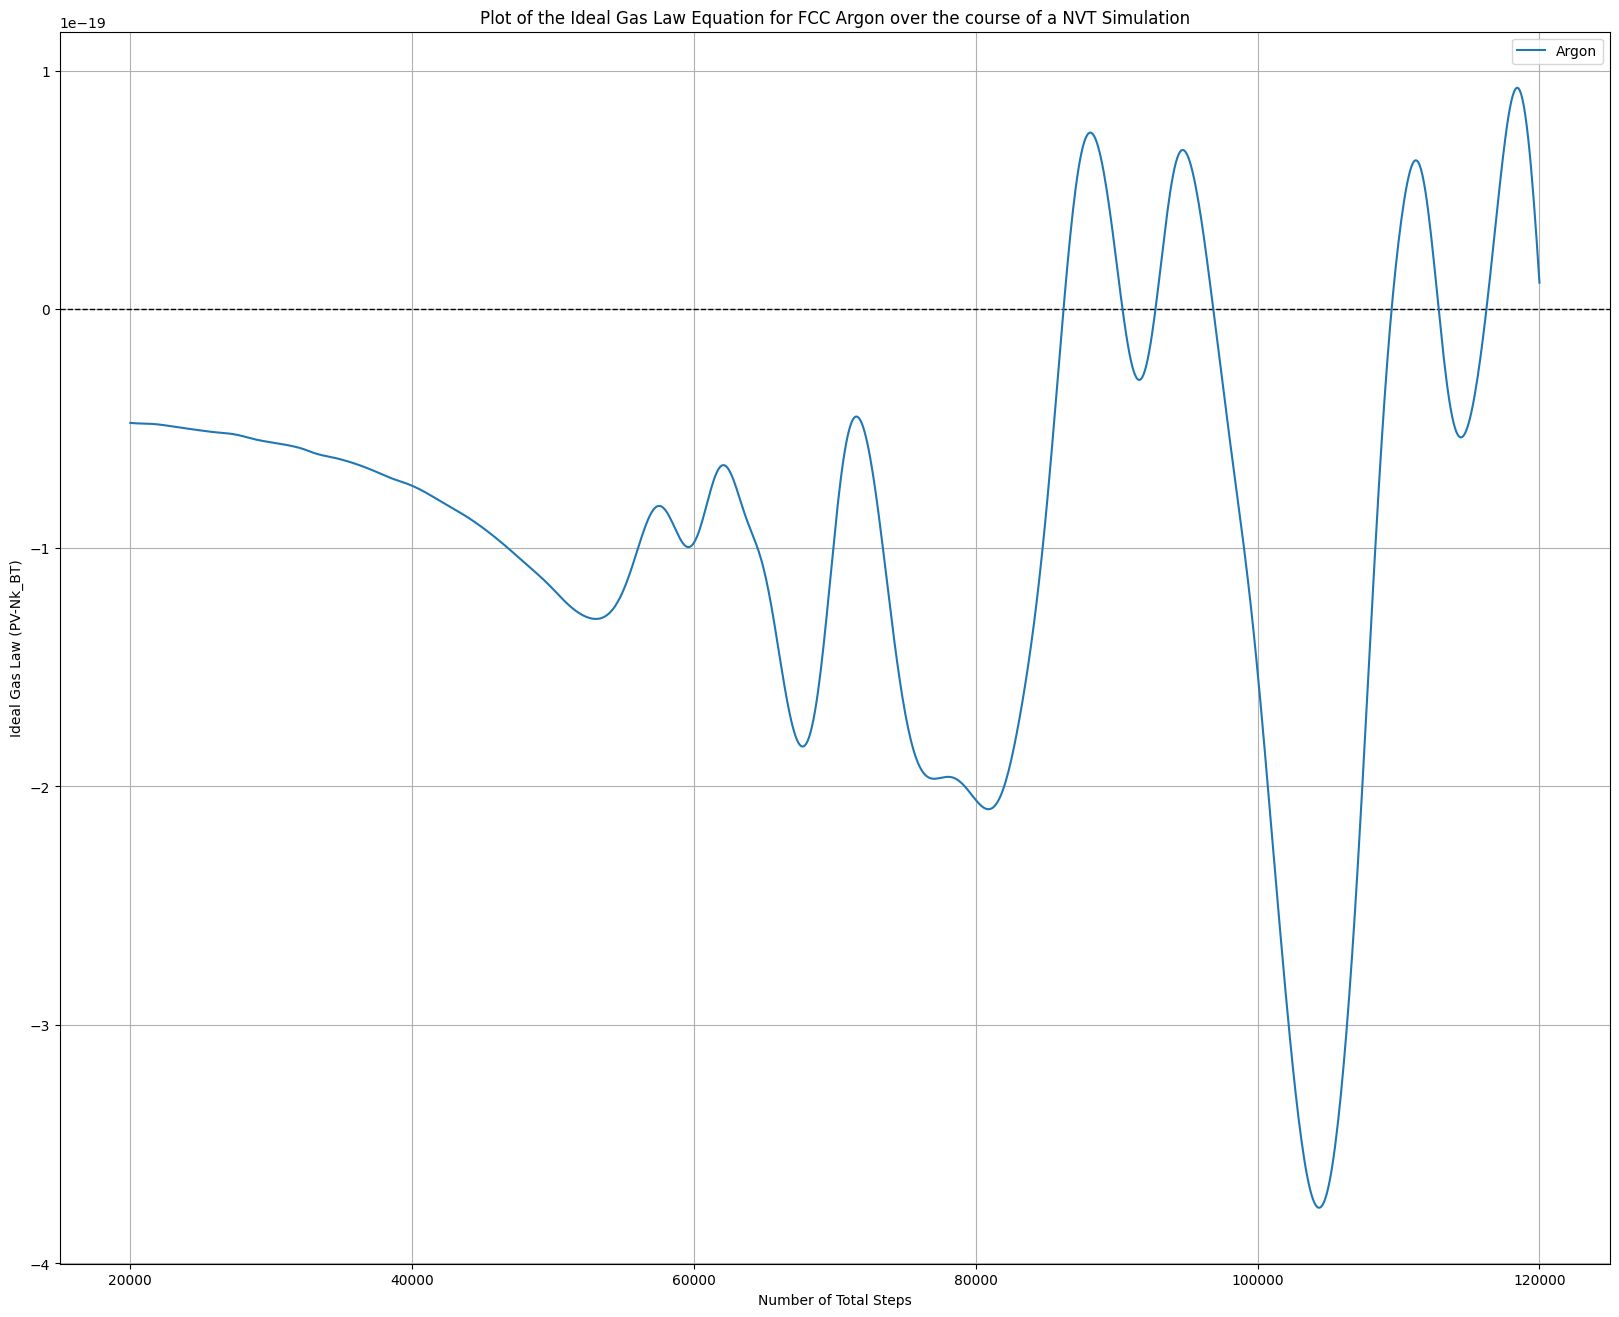

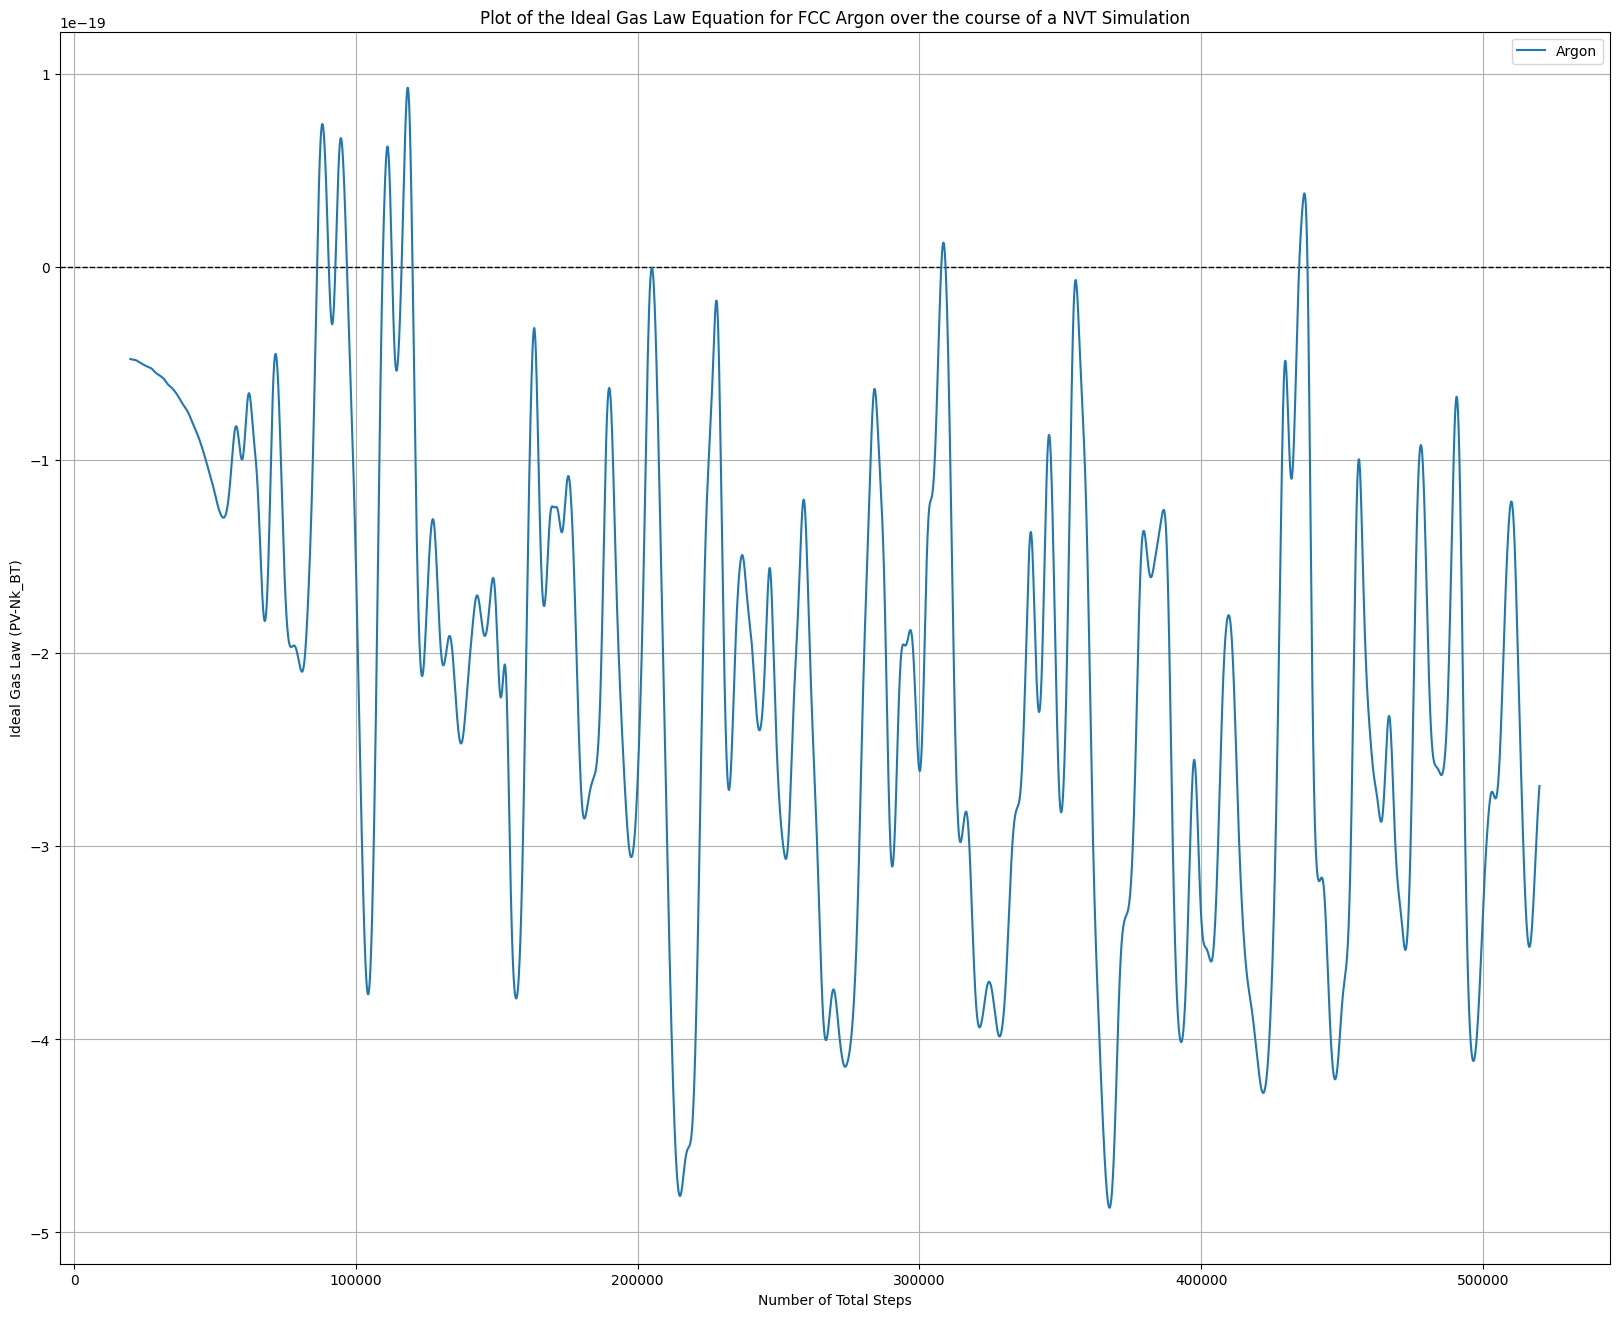

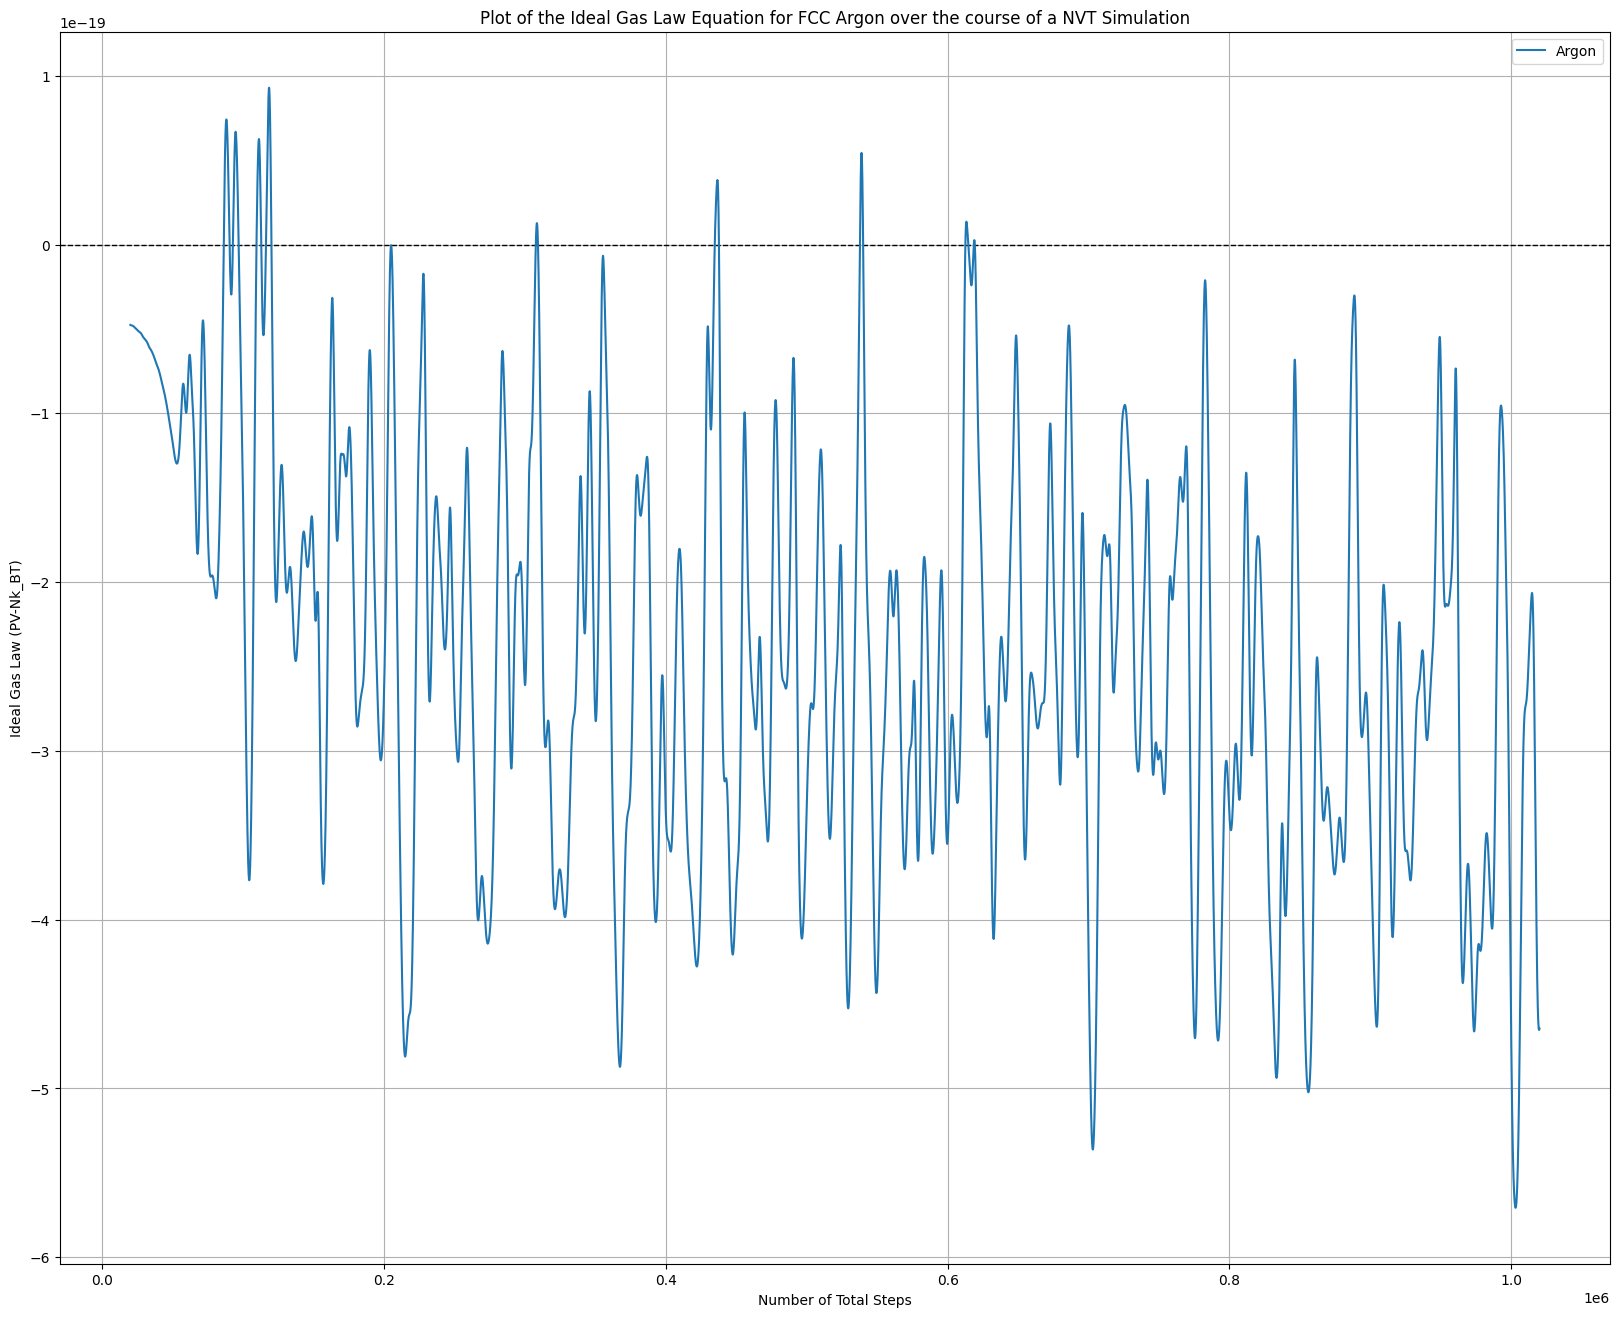

In [31]:
PVNRT_Sim1 = read_TPVE_File("Exercise1/slurm-540.out", 100000, framesPerSave)
PVNRT_Sim2 = read_TPVE_File("Exercise1/slurm-542.out", 500000, framesPerSave)
PVNRT_Sim3 = read_TPVE_File("Exercise1/slurm-546.out", 1000000, framesPerSave)

plot_PVRNT(PVNRT_Sim1)
plot_PVRNT(PVNRT_Sim2)
plot_PVRNT(PVNRT_Sim3)


# Exercise 2 : Plot the Radial Function
----

/tmp/ipykernel_117627/2262072416.py:37: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pandas.read_csv(path, skiprows=4 + i * (n_bins + 1), nrows = n_bins, delim_whitespace=True, header=None)
/tmp/ipykernel_117627/2262072416.py:37: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pandas.read_csv(path, skiprows=4 + i * (n_bins + 1), nrows = n_bins, delim_whitespace=True, header=None)
/tmp/ipykernel_117627/2262072416.py:37: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pandas.read_csv(path, skiprows=4 + i * (n_bins + 1), nrows = n_bins, delim_whitespace=True, header=None)
/tmp/ipykernel_117627/2262072416.py:37: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and

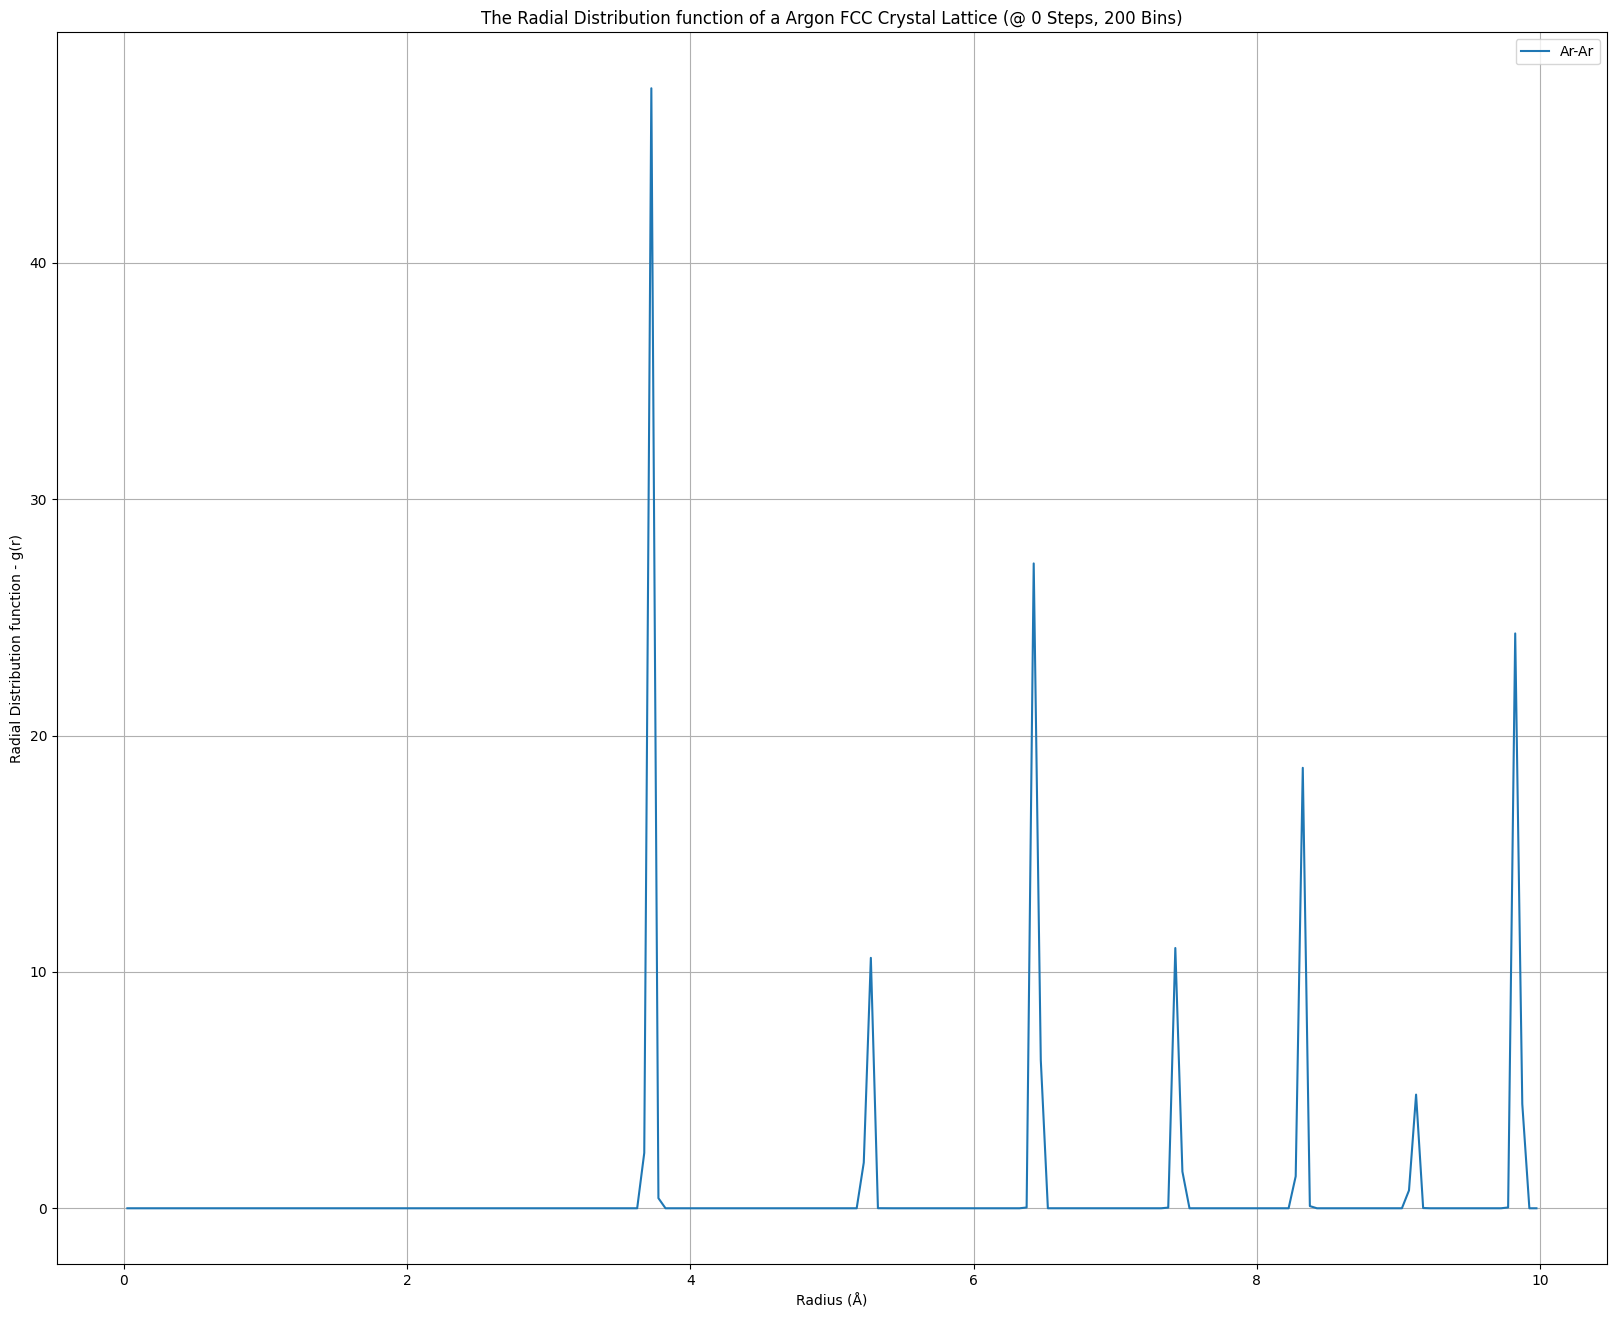

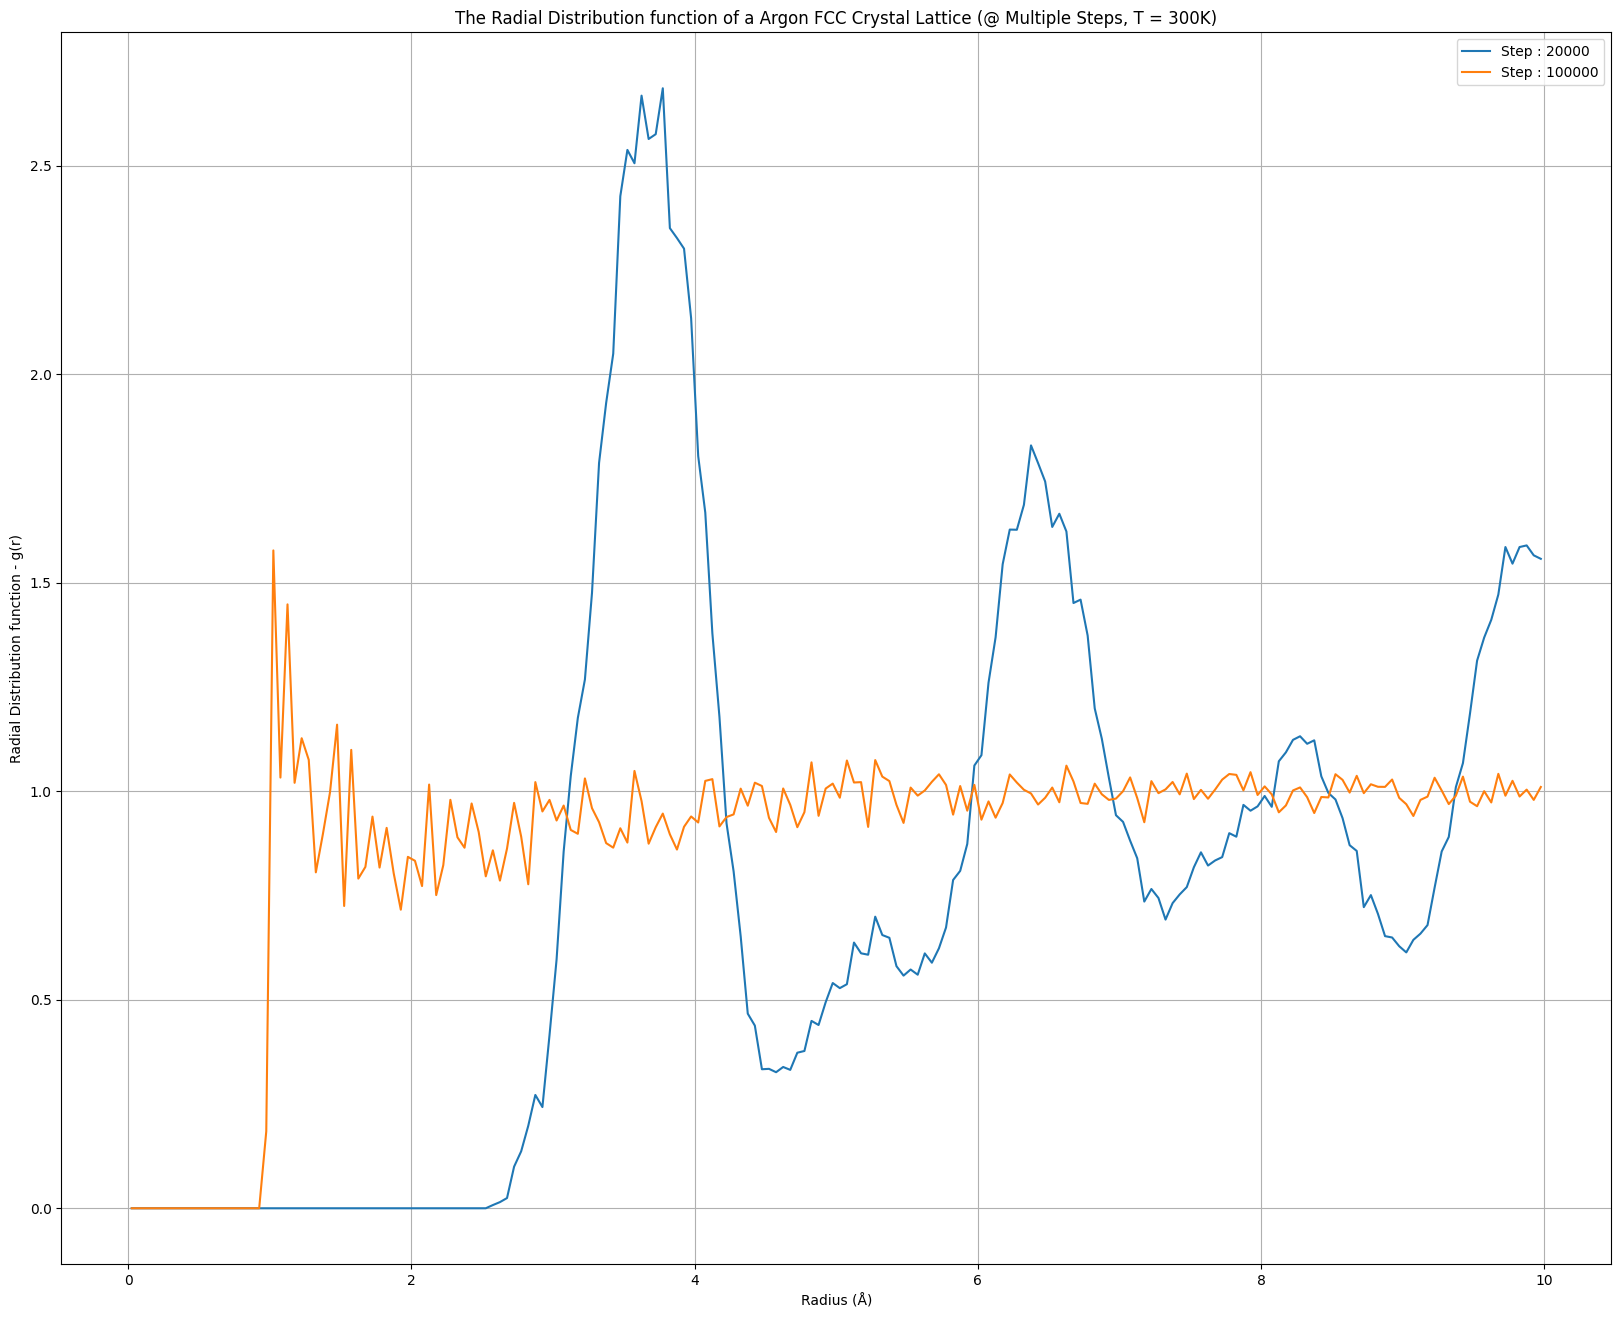

In [32]:
RDF_Pre_Sim5 = read_RDF_File("Exercise2/RDF_Pre_Sim1.data", 200)
RDF_Sim5 = read_RDF_File("Exercise2/RDF_Sim1.data", 200)


dfs = [ RDF_Pre_Sim5[20], RDF_Pre_Sim5[-1]]
labels = [ "Step : 20000", "Step : 100000"]

plot_RDF(RDF_Pre_Sim5[0], f"@ {0} Steps, 200 Bins")
plot_multi_RDF(dfs, "@ Multiple Steps, T = 300K", labels)

#plot_RDF(RDF_Pre_Sim5[19], f"@ {20000} Steps, 200 Bins")
#plot_RDF(RDF_Pre_Sim5[99], f"@ {100000} Steps, 200 Bins")
#plot_RDF(RDF_Pre_Sim5[-1], f"@ {500000} Steps, 200 Bins")